<a href="https://colab.research.google.com/github/2208504/New-Folder/blob/master/Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting Google Drive 
#basically this is giving the notebook access to the google drive to view different datasets.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Import libraries
#If there are any problems with importing libraries use !pip install libraryname

import pandas as pd #Good for viewing and overall working with the data
import numpy as np #Math library, likeley that we won't need it
import glob #(I think it's. for searching through folders and stuff)
import matplotlib.pyplot as plt  #for ploting data.  <=============================
import seaborn as sns  #Basically another tool for visualization <=================

In [3]:
#from pandas.core.arrays.interval import pd_array #idk what this does
#Setting up code so that it doesn't need to be changed for different colab setups
#paths are basically the same except for Colab_Notebooks/Machine_Learning folders
try:
  data=pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/JQ_ML_Project/Datasets/stock_market_data/sp500/csv/ZTS.csv') #Tori School account
except:
  try:
    data=pd.read_csv('/content/gdrive/MyDrive/Machine_Learning/JQ_ML_Project/Datasets/stock_market_data/sp500/csv/ZTS.csv') #JQ account
  except:
    data=pd.read_csv('/content/gdrive/MyDrive/') #for adding another account
data #prints dataset, don't use print(data) becasue that will give ugly formating

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,01-02-2013,30.469999,31.500000,66789100,31.740000,31.010000,29.014498
1,04-02-2013,30.760000,31.090000,7695400,31.990000,31.020000,29.023853
2,05-02-2013,30.850000,31.250000,5013200,31.980000,31.040001,29.042564
3,06-02-2013,30.750000,30.980000,2126100,31.430000,31.030001,29.033203
4,07-02-2013,31.000000,31.000000,3800800,32.730000,32.000000,29.940786
...,...,...,...,...,...,...,...
2445,18-10-2022,149.770004,153.710007,2783100,154.389999,150.419998,150.419998
2446,19-10-2022,145.880005,149.399994,1983700,150.009995,148.130005,148.130005
2447,20-10-2022,144.169998,147.509995,2327200,148.220001,144.429993,144.429993
2448,21-10-2022,142.119995,143.940002,2354100,147.690002,147.210007,147.210007


Dataset Website:https://www.kaggle.com/datasets/paultimothymooney/stock-market-data

In [4]:
data.info() #Checking what type of values each column has to make sure they are compatable with algorithms
#Notice that Date is an object, it will need to be converted to either a stirng or datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2450 non-null   object 
 1   Low             2450 non-null   float64
 2   Open            2450 non-null   float64
 3   Volume          2450 non-null   int64  
 4   High            2450 non-null   float64
 5   Close           2450 non-null   float64
 6   Adjusted Close  2450 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 134.1+ KB


In [ ]:
# import necessary libraries
import pandas as pd
import os
import glob
  

#uses glob module to get a list of all paths to files in sp500 folder
try:
  csv_files = glob.glob(os.path.join('/content/gdrive/MyDrive/Colab_Notebooks/JQ_ML_Project/Datasets/stock_market_data/sp500/csv', "*.csv"))
except:
  csv_files = glob.glob(os.path.join('/content/gdrive/MyDrive/Machine_Learning/JQ_ML_Project/Datasets/stock_market_data/sp500/csv', "*.csv"))

#Defines empty dataframe named df
df=pd.DataFrame()



# loop over the list of csv files, every f is essentially a path to a different csv file generated by glob
for f in csv_files:

  #Spliting the string f to iscolate the stock name
    string=f.split('/')  #Spliting string into a list with the seperation of the elements determined by '/'s
    string=string.pop(10) #defines variable string as the 10's element in the list created above (will be of form stock.csv)
    string=string.split('.')  #Splits string into a list with the seperation of elements determined by '.'
    string=string.pop(0)  #Defines string to be the first element in the list generated above

    stock = pd.read_csv(f)  #Reads the path held in f into a dataframe with variable name stock
    stock['Stock']=string #for each row of dataframe value of stock column is defined to be string, the stock name we found before
    df=pd.concat([stock,df])  #adds dataframe labled in stock to already existing dataframe df
    
df=df.reset_index()  #Will ensure that index value does not restart at the end of each csv file <=============================================
df #prints whole dataframe which includes values for each stock in the sp500

In [6]:
#Converts Date column and stock column to strings
df['Stock']=df['Stock'].astype('string')
df['Date']=df['Date'].astype('string')  #we might latter need to convert the date to a different datatype, but I believe that a string will work
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3251440 entries, 0 to 3251439
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   index           int64  
 1   Date            string 
 2   Low             float64
 3   Open            float64
 4   Volume          float64
 5   High            float64
 6   Close           float64
 7   Adjusted Close  float64
 8   Stock           string 
dtypes: float64(6), int64(1), string(2)
memory usage: 223.3 MB
None


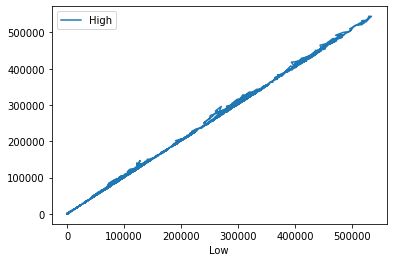

In [7]:
columnvalue=df['Stock'].unique() #Retrieves a list of all unique values in Stock column

df.plot(x="Low", y="High");  #Plots the high and low values against eachother

This isn't supper important, but I found it a little interesting at least. It is ploting every high value against every low. It looks like it is very close to one to one.

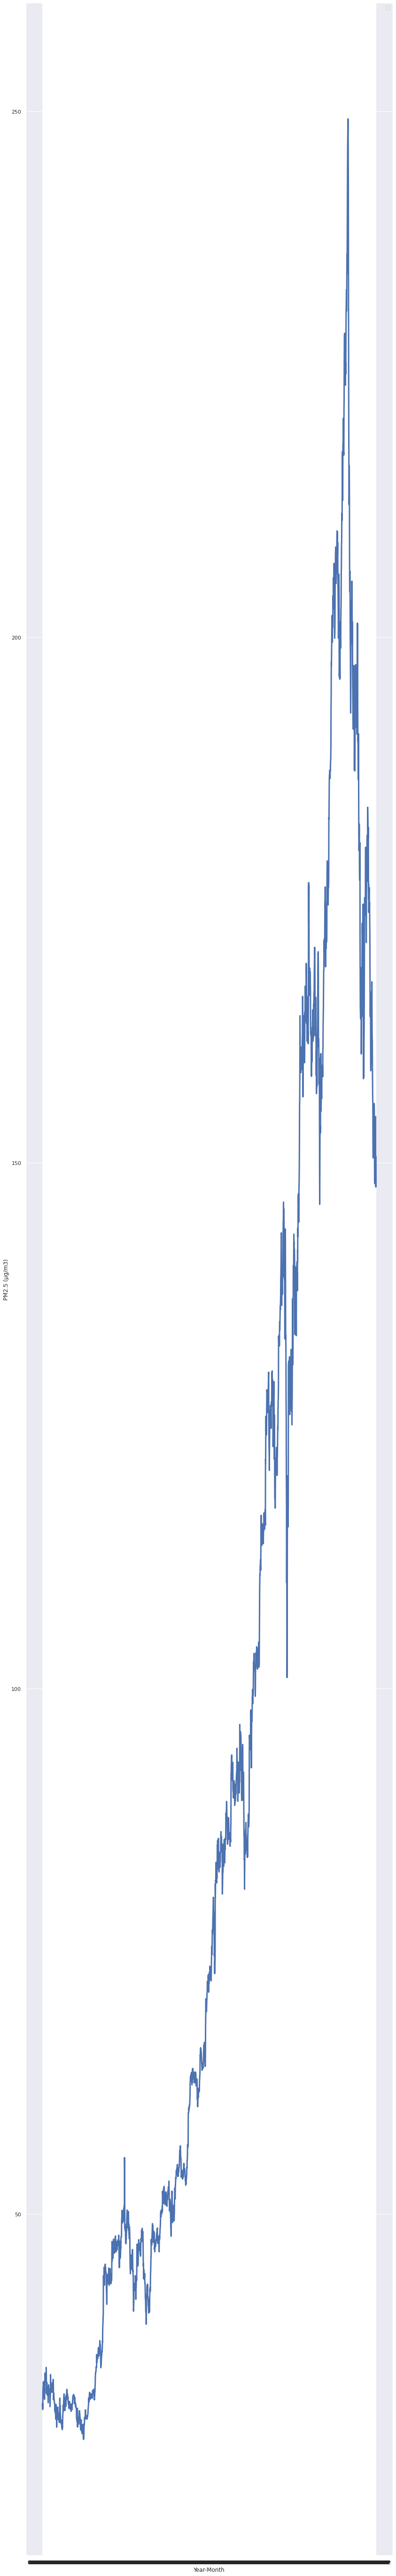

In [8]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,100)})

ax = sns.lineplot(data=data, x ='Date', y = 'High', palette='viridis',legend='full', lw=3)

#ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('PM2.5 (µg/m3)')
plt.xlabel('Year-Month')
plt.show()

I believe that with that our dataset is correctley formated, and we can start doing analysis of the data, either based on each individual stock, or otherwise.
I think a few things would be useful to start with. This is basically where my knowlege is less great becuase I have never really done this type of analysis before. I think a lot of it will just be decinding exactley what we want to look at.

Max/min stock prices

average prices for each stock

plot each stock price over time

caculate age of each stock

graphing the slope of each stock price might be interesting to look at perhaps?

Here is a refereence for tyoes of stock market visualization:https://www.liberatedstocktrader.com/compare-stock-chart-types/#Line_Stock_Charts


#### trying to get the index to work correctley ↓↓↓↓↓↓

In [ ]:
df=df.reset_index()
df

In [ ]:
#data['stock']=string_value



```
# This is formatted as code
```

#### Playing with combining datasets ↓↓↓↓↓↓
Basically everything here down is my idea of how we could compair all of the data in one dataset, it will need to be changed a lot because I just chose a few random stocks

In [ ]:
data['Stock']='ZTS' #adds a column to the dataset naming the stock in preperation for combining CSV's
ZTS=data #rename the dataset to be ZTS
ZTS.info()
#Two goals, 1) add multiple datasets to the same dataframe for use. 2) convert objects to strings
#I will do 1 first because then I will only need to do 2 one time

In [12]:
try:
  ZION=pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/JQ_ML_Project/Datasets/stock_market_data/sp500/csv/ZION.csv') #Tori School account
except:
  try:
    ZION=pd.read_csv('/content/gdrive/MyDrive/Machine_Learning/JQ_ML_Project/Datasets/stock_market_data/sp500/csv/ZION.csv') #JQ account
  except:
    data=pd.read_csv('/content/gdrive/MyDrive/') #for adding another account
data #prints dataset, don't use print(data) becasue that will give ugly formating
#It looks like this stock dates back to 1980, Dang!

,Date,Low,Open,Volume,High,Close,Adjusted Close,Stock
0,01-02-2013,30.469999,31.500000,66789100,31.740000,31.010000,29.014498,ZTS
1,04-02-2013,30.760000,31.090000,7695400,31.990000,31.020000,29.023853,ZTS
2,05-02-2013,30.850000,31.250000,5013200,31.980000,31.040001,29.042564,ZTS
3,06-02-2013,30.750000,30.980000,2126100,31.430000,31.030001,29.033203,ZTS
4,07-02-2013,31.000000,31.000000,3800800,32.730000,32.000000,29.940786,ZTS
...,...,...,...,...,...,...,...,...
2445,18-10-2022,149.770004,153.710007,2783100,154.389999,150.419998,150.419998,ZTS
2446,19-10-2022,145.880005,149.399994,1983700,150.009995,148.130005,148.130005,ZTS
2447,20-10-2022,144.169998,147.509995,2327200,148.220001,144.429993,144.429993,ZTS
2448,21-10-2022,142.119995,143.940002,2354100,147.690002,147.210007,147.210007,ZTS


In [13]:
ZION['Stock']='ZION'
#This one deffinitley has enough data to be interesting
#Note that in this one the first values start above 12, so the format is deffinitley dd-mm-yyyy

In [14]:
result=pd.concat([ZTS,ZION]) #Joining ZTS and ZION datasets
result #Printing results

,Date,Low,Open,Volume,High,Close,Adjusted Close,Stock
0,01-02-2013,30.469999,31.500000,66789100,31.740000,31.010000,29.014498,ZTS
1,04-02-2013,30.760000,31.090000,7695400,31.990000,31.020000,29.023853,ZTS
2,05-02-2013,30.850000,31.250000,5013200,31.980000,31.040001,29.042564,ZTS
3,06-02-2013,30.750000,30.980000,2126100,31.430000,31.030001,29.033203,ZTS
4,07-02-2013,31.000000,31.000000,3800800,32.730000,32.000000,29.940786,ZTS
...,...,...,...,...,...,...,...,...
10739,18-10-2022,51.520000,52.959999,1541600,53.389999,51.980000,51.980000,ZION
10740,19-10-2022,48.680000,51.320000,2049500,51.610001,49.220001,49.220001,ZION
10741,20-10-2022,46.680000,49.180000,2301200,49.639999,47.130001,47.130001,ZION
10742,21-10-2022,46.580002,47.180000,2381100,48.500000,47.820000,47.820000,ZION


In [15]:
result['Stock']=result['Stock'].astype('string') #Trying to convert t
result.info()
result.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13194 entries, 0 to 10743
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            13194 non-null  object 
 1   Low             13194 non-null  float64
 2   Open            13194 non-null  float64
 3   Volume          13194 non-null  int64  
 4   High            13194 non-null  float64
 5   Close           13194 non-null  float64
 6   Adjusted Close  13194 non-null  float64
 7   Stock           13194 non-null  string 
dtypes: float64(5), int64(1), object(1), string(1)
memory usage: 927.7+ KB


Date               object
Low               float64
Open              float64
Volume              int64
High              float64
Close             float64
Adjusted Close    float64
Stock              string
dtype: object

In [16]:
# import necessary libraries
import pandas as pd
import os
import glob
  

# use glob to get all the csv files 
# in the folder
#path = os.getcwd()
csv_files = glob.glob(os.path.join('/content/gdrive/MyDrive/Colab_Notebooks/JQ_ML_Project/Datasets/stock_market_data/sp500/csv', "*.csv"))
df=pd.DataFrame()
  
# loop over the list of csv files
for f in csv_files:
    string=f.split('/')
    string=string.pop(10)
    string=string.split('.')
    string=string.pop(0)
    print(type(string))
    print(string)
    # read the csv file
    stock = pd.read_csv(f)
    print(type(stock))
    stock['Stock']=string
    #df['Stock']=string
    df=pd.concat([stock,df])
    #f['Stock']=string
    print(f)

<class 'str'>
ALTR
<class 'pandas.core.frame.DataFrame'>
/content/gdrive/MyDrive/Colab_Notebooks/JQ_ML_Project/Datasets/stock_market_data/sp500/csv/ALTR.csv
<class 'str'>
AIZ
<class 'pandas.core.frame.DataFrame'>
/content/gdrive/MyDrive/Colab_Notebooks/JQ_ML_Project/Datasets/stock_market_data/sp500/csv/AIZ.csv
<class 'str'>
AAPL
<class 'pandas.core.frame.DataFrame'>
/content/gdrive/MyDrive/Colab_Notebooks/JQ_ML_Project/Datasets/stock_market_data/sp500/csv/AAPL.csv
<class 'str'>
A
<class 'pandas.core.frame.DataFrame'>
/content/gdrive/MyDrive/Colab_Notebooks/JQ_ML_Project/Datasets/stock_market_data/sp500/csv/A.csv
<class 'str'>
AAL
<class 'pandas.core.frame.DataFrame'>
/content/gdrive/MyDrive/Colab_Notebooks/JQ_ML_Project/Datasets/stock_market_data/sp500/csv/AAL.csv
<class 'str'>
ADI
<class 'pandas.core.frame.DataFrame'>
/content/gdrive/MyDrive/Colab_Notebooks/JQ_ML_Project/Datasets/stock_market_data/sp500/csv/ADI.csv
<class 'str'>
ACN
<class 'pandas.core.frame.DataFrame'>
/content/gdriv

In [ ]:
df

In [ ]:
df['Stock']=df['Stock'].astype('string')
print(df.info())

In [ ]:
for f in csv_files:
    string=f.split('/')
    string=string.pop(10)
    string=string.split('.')
    string=string.pop(0)

In [20]:
df 
#so it is combinging all of the datasets, it just isn't adding another column with the name in it, this shouldn't be too terrible
#To figure out right? I mean... It can't be that hard right? well, I know what the problem is: I need to figure out how to retrive the name
#of each file being read, and then set the 

,Date,Low,Open,Volume,High,Close,Adjusted Close,Stock
0,13-10-2011,23.000000,23.500000,396800.0,24.270000,24.250000,20.845800,XYL
1,14-10-2011,24.360001,24.360001,402600.0,25.490000,25.350000,21.791388,XYL
2,17-10-2011,25.160000,25.500000,583400.0,25.799999,25.160000,21.628056,XYL
3,18-10-2011,24.900000,25.059999,423500.0,25.360001,25.240000,21.696827,XYL
4,19-10-2011,24.750000,25.250000,722200.0,25.350000,24.750000,21.275618,XYL
...,...,...,...,...,...,...,...,...
1248,18-10-2022,45.599998,46.389999,166700.0,46.904999,46.029999,46.029999,ALTR
1249,19-10-2022,45.075001,45.389999,350100.0,45.880001,45.400002,45.400002,ALTR
1250,20-10-2022,44.764999,45.490002,516600.0,46.470001,44.919998,44.919998,ALTR
1251,21-10-2022,44.180000,44.990002,235200.0,45.939999,45.759998,45.759998,ALTR
